ARTI308 - Machine Learning


## Defining the Machine Learning Problem

This is a sales analysis problem.
The dataset contains video game sales features such as platform, genre, publisher, year, and regional sales.

The goal is to identify sales patterns and the factors associated with high global sales.


In [19]:
# Import libraries used throughout the notebook
import pandas as pd                  # Data handling with DataFrame objects
import numpy as np                   # Numerical helpers (optional here)
import matplotlib.pyplot as plt      # Core plotting library
import seaborn as sns                # Statistical plotting built on matplotlib

# Apply seaborn default style to all plots
sns.set()


In [20]:
# Load CSV file into a DataFrame
# pd.read_csv(...) reads tabular text data into memory
# df.head() returns the first 5 rows for quick inspection
df = pd.read_csv('vgsales.csv')
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Check Missing Values


In [21]:
# df.isna() marks missing values as True/False
# .sum() adds True values column-wise -> count of missing values per column
df.isna().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [22]:
# print(...) shows the same missing-value counts in plain text output
print(df.isna().sum())


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


### Check duplicate rows


In [23]:
# df.duplicated() flags repeated rows
# .sum() counts how many duplicates exist
df.duplicated().sum()


np.int64(0)

### No. of rows and columns


In [24]:
# df.shape returns (number_of_rows, number_of_columns)
df.shape


(16598, 11)

### Data type of columns


In [25]:
# df.dtypes shows the data type of every column
# Example: int64, float64, object (string-like)
df.dtypes


Rank              int64
Name                str
Platform            str
Year            float64
Genre               str
Publisher           str
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [26]:
# pd.to_numeric(..., errors='coerce') converts values to numbers
# invalid values become NaN when coercion is used
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# fillna('Unknown') replaces missing Publisher values
df['Publisher'] = df['Publisher'].fillna('Unknown')

# confirm updated data types after cleaning
print(df.dtypes)


Rank              int64
Name                str
Platform            str
Year            float64
Genre               str
Publisher           str
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


### Statistical summary


In [27]:
# df.describe() returns summary statistics for numeric columns
# count, mean, std, min, quartiles, max
df.describe()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Distribution of Global Sales


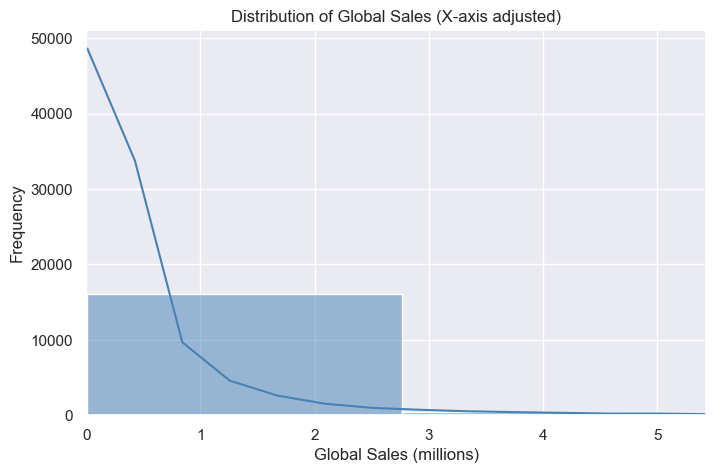

In [28]:
# Create a new figure with fixed size
plt.figure(figsize=(8,5))

# sns.histplot with x= uses Global_Sales on the x-axis
# bins controls bar count, kde=True overlays a smooth density curve
sns.histplot(data=df, x='Global_Sales', bins=30, kde=True, color='steelblue')

# Axis/title labels and x-range focus
plt.title('Distribution of Global Sales (X-axis adjusted)')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Frequency')
plt.xlim(0, df['Global_Sales'].quantile(0.99))  # hide extreme outliers for readability
plt.show()  # render the chart


### Distribution of NA Sales


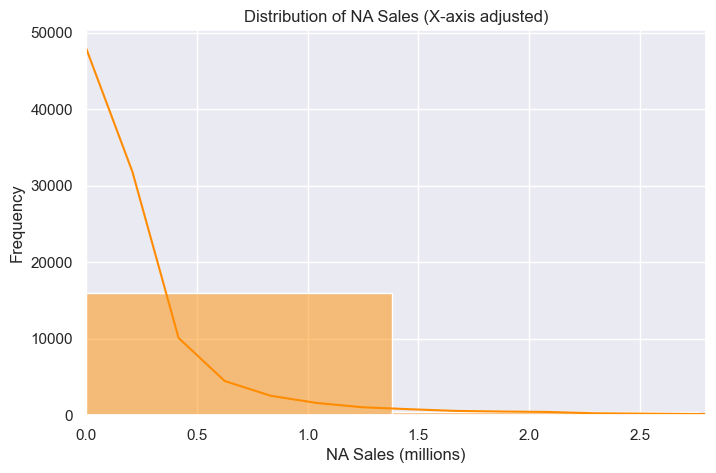

In [29]:
# Create a new figure with fixed size
plt.figure(figsize=(8,5))

# Plot histogram using NA_Sales on x-axis
sns.histplot(data=df, x='NA_Sales', bins=30, kde=True, color='darkorange')

# Labels and x-axis focus on central distribution
plt.title('Distribution of NA Sales (X-axis adjusted)')
plt.xlabel('NA Sales (millions)')
plt.ylabel('Frequency')
plt.xlim(0, df['NA_Sales'].quantile(0.99))
plt.show()


### Global Sales by Platform


In [30]:
# groupby('Platform') splits data by platform
# ['Global_Sales'].sum() totals sales per platform
# sort_values(ascending=False) ranks highest to lowest
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# head(10) returns top 10 entries
platform_sales.head(10)


Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
Name: Global_Sales, dtype: float64

### Global Sales by Genre


In [31]:
# Same pattern as above, grouped by Genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sales


Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

### Global Sales by Publisher


In [32]:
# Same pattern as above, grouped by Publisher
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
publisher_sales.head(10)


Publisher
Nintendo                        1786.56
Electronic Arts                 1110.32
Activision                       727.46
Sony Computer Entertainment      607.50
Ubisoft                          474.72
Take-Two Interactive             399.54
THQ                              340.77
Konami Digital Entertainment     283.64
Sega                             272.99
Namco Bandai Games               254.09
Name: Global_Sales, dtype: float64

### NA Sales vs Global Sales


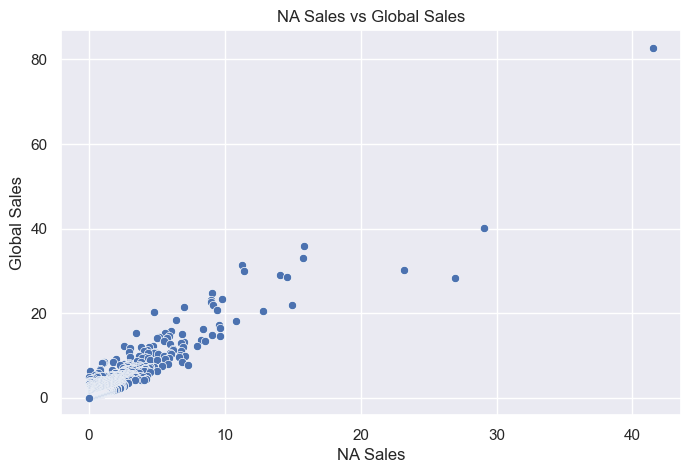

In [33]:
plt.figure(figsize=(8,5))

# scatterplot maps one variable to x and another to y
# helps visualize relationship between NA and Global sales
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=df)

plt.title('NA Sales vs Global Sales')
plt.xlabel('NA Sales')
plt.ylabel('Global Sales')
plt.show()


### Correlation Heatmap


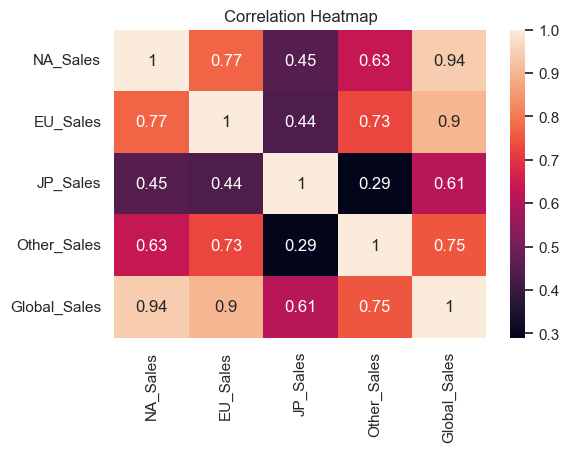

In [34]:
# List numeric sales columns used in correlation analysis
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

plt.figure(figsize=(6,4))

# df[sales_columns].corr() computes pairwise Pearson correlations
# sns.heatmap visualizes correlation matrix; annot=True prints values inside cells
sns.heatmap(df[sales_columns].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


### Yearly Global Sales Trend


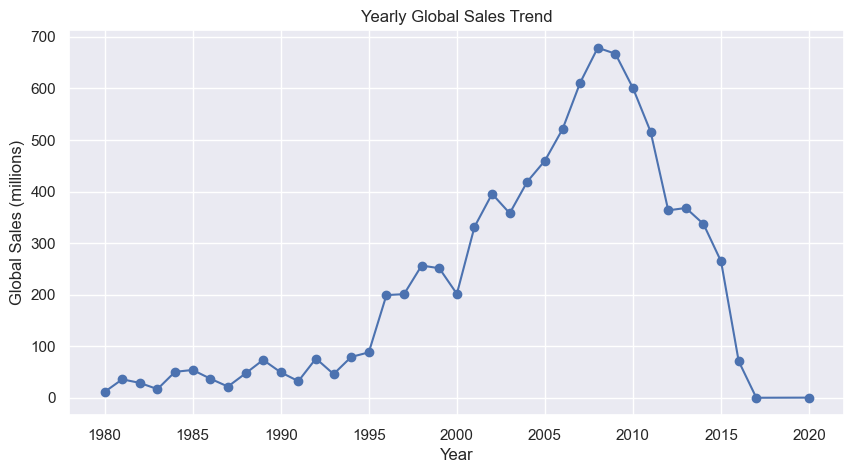

In [35]:
# round() removes decimal noise in Year values, astype('Int64') keeps nullable integer type
df['Year_Int'] = df['Year'].round().astype('Int64')

# dropna(subset=...) removes rows with missing Year_Int before grouping
# groupby('Year_Int')['Global_Sales'].sum() gives total global sales by year
yearly_sales = df.dropna(subset=['Year_Int']).groupby('Year_Int')['Global_Sales'].sum()

plt.figure(figsize=(10,5))

# line plot using year index on x-axis and sales totals on y-axis
plt.plot(yearly_sales.index.astype(int), yearly_sales.values, marker='o')
plt.title('Yearly Global Sales Trend')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.show()


### Key Findings


In [36]:
# idxmax() returns the index label with the largest value in each series
print('Top Platform by Global Sales:', platform_sales.idxmax())
print('Top Genre by Global Sales:', genre_sales.idxmax())
print('Top Publisher by Global Sales:', publisher_sales.idxmax())

# round(..., 2) limits numeric display to 2 decimals
print('Total Global Sales:', round(df['Global_Sales'].sum(), 2), 'million units')


Top Platform by Global Sales: PS2
Top Genre by Global Sales: Action
Top Publisher by Global Sales: Nintendo
Total Global Sales: 8920.44 million units
